## Pre-Processing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
# read the wine data CSV file
wineDF = pd.read_csv("qualityWhiteWineDF.csv")
wineDF.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


## Exploratory Analysis

In [3]:
wineDF["quality"].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [4]:
wineDF.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## Training and Testing the Random Forest Model

In [5]:
# split the data into y (quality) X (all other columns)
y = wineDF["quality"]
X = wineDF.drop(columns="quality")

In [6]:
y[:5]

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [7]:
X[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


In [8]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# make the standardScaler object
scaler = StandardScaler()

In [10]:
# fit the data onto the training data
xScaler = scaler.fit(x_train)

In [11]:
# scale the data using .transform function
x_train_scaled = xScaler.transform(x_train)
x_test_scaled = xScaler.transform(x_test)

In [12]:
# import the modules for the accuracy score and classification report
from sklearn.metrics import accuracy_score, classification_report

In [13]:
# attempt to improve the prerformance using an ensemble classifier (Random Forest)
# import the random forest classifier module
from sklearn.ensemble import RandomForestClassifier

In [14]:
# import the random forest classifier module
from sklearn.ensemble import RandomForestClassifier

# Ignore the warning related to feature names
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Create a modified version of the RandomForestClassifier class
class ModifiedRandomForest(RandomForestClassifier):
    def fit(self, X, y):
        return super().fit(X, y)

# make the random forest classifier model - use 500 estimators
rfModel = ModifiedRandomForest(n_estimators=500, random_state=42)

In [15]:
# fit the model on the scaled trained data
rfModel = rfModel.fit(x_train_scaled, y_train)

In [16]:
# make a list of predicted values using the scaled testing data
rfPredictedValues = rfModel.predict(x_test_scaled)
rfPredictedValues[:3]

array([6, 7, 5])

In [17]:
# check the accuracy score
rfAccuracyScore = accuracy_score(y_test, rfPredictedValues)
print(f"Random Forest Accuracy Score: {rfAccuracyScore * 100:.2f}%")

Random Forest Accuracy Score: 58.26%


In [18]:
# check the classification report
print(classification_report(y_test, rfPredictedValues))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.67      0.19      0.30        31
           5       0.62      0.60      0.61       235
           6       0.57      0.75      0.65       358
           7       0.56      0.32      0.41       138
           8       0.50      0.04      0.07        26
           9       0.00      0.00      0.00         1

    accuracy                           0.58       793
   macro avg       0.42      0.27      0.29       793
weighted avg       0.58      0.58      0.56       793



# Random Forest Machine Learning Model  - Accuracy Score: 58.26%

## Resampling to improve class imbalance

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Perform oversampling using RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
x_train_resampled, y_train_resampled = oversampler.fit_resample(x_train_scaled, y_train)

# Train the RandomForestClassifier on the resampled data
rfModelResample = RandomForestClassifier(n_estimators=500, random_state=42)
rfModelResample.fit(x_train_resampled, y_train_resampled)

# Make predictions on the test set
rfPredictedValues = rfModelResample.predict(x_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, rfPredictedValues)
classificationReport = classification_report(y_test, rfPredictedValues)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:")
print(classificationReport)

Accuracy: 0.5687263556116016
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.58      0.23      0.33        31
           5       0.62      0.63      0.62       235
           6       0.57      0.66      0.61       358
           7       0.48      0.43      0.46       138
           8       0.17      0.04      0.06        26
           9       0.00      0.00      0.00         1

    accuracy                           0.57       793
   macro avg       0.35      0.28      0.30       793
weighted avg       0.55      0.57      0.56       793



## Resampling  - Accuracy Score: 56.87%

## Hyperparameter tuning using GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV
##from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 600],      # Number of trees in the forest
    'max_depth': [None, 5],          # Maximum depth of each tree
    'min_samples_split': [2, 5],     # Minimum number of samples required to split an internal node
    'ccp_alpha': [0.0, 0.2],         # Complexity parameter used for Minimal Cost-Complexity Pruning (ccp)
    'max_samples': [None, 0.5],      # Number of samples to draw from X to train each base estimator
    'warm_start': [True, False]      # Whether to reuse the previous solution to initialize the next fit
}

# Create the Random Forest model
rfModelTuning = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(rfModelTuning, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X, y)

# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'ccp_alpha': 0.0, 'max_depth': None, 'max_samples': 0.5, 'min_samples_split': 2, 'n_estimators': 600, 'warm_start': False}
Best Score: 0.5352201077610913


## Hyperparameter tuning - Accuracy Score: 60.03%

## Extract the feature importances

In [21]:
# extract the feature importances from the random forest classifier
importantFeatures = rfModel.feature_importances_

# sort the features by their importance, zip them, then display them
zippedFeatures = sorted(zip(importantFeatures, X.columns), reverse=True)
zippedFeatures

[(0.11671309449157852, 'alcohol'),
 (0.10473712994990379, 'density'),
 (0.09663948538076797, 'free sulfur dioxide'),
 (0.09432985979767657, 'volatile acidity'),
 (0.09046026227529931, 'total sulfur dioxide'),
 (0.08787938460815779, 'residual sugar'),
 (0.08689471526015155, 'pH'),
 (0.08499679547315213, 'chlorides'),
 (0.08138836246309683, 'sulphates'),
 (0.08092124771232719, 'citric acid'),
 (0.07503966258788841, 'fixed acidity')]

In [22]:
# to visualize the features by their importance
importantFeaturesDF = pd.DataFrame(zippedFeatures)
importantFeaturesDF

,0,1
0,0.116713,alcohol
1,0.104737,density
2,0.096639,free sulfur dioxide
3,0.094330,volatile acidity
4,0.090460,total sulfur dioxide
5,0.087879,residual sugar
6,0.086895,pH
7,0.084997,chlorides
8,0.081388,sulphates
9,0.080921,citric acid


In [23]:
importantFeaturesDF.set_index(importantFeaturesDF[1], inplace=True)
importantFeaturesDF

,0,1
1,,
alcohol,0.116713,alcohol
density,0.104737,density
free sulfur dioxide,0.096639,free sulfur dioxide
volatile acidity,0.094330,volatile acidity
total sulfur dioxide,0.090460,total sulfur dioxide
residual sugar,0.087879,residual sugar
pH,0.086895,pH
chlorides,0.084997,chlorides
sulphates,0.081388,sulphates


In [24]:
# drop the extra 1 column
importantFeaturesDF.drop(columns=1, inplace=True)
importantFeaturesDF

,0
1,
alcohol,0.116713
density,0.104737
free sulfur dioxide,0.096639
volatile acidity,0.094330
total sulfur dioxide,0.090460
residual sugar,0.087879
pH,0.086895
chlorides,0.084997
sulphates,0.081388


In [25]:
# rename the 0 column
importantFeaturesDF.rename(columns={0: 'Feature Importances'}, inplace=True)
importantFeaturesDF

,Feature Importances
1,
alcohol,0.116713
density,0.104737
free sulfur dioxide,0.096639
volatile acidity,0.094330
total sulfur dioxide,0.090460
residual sugar,0.087879
pH,0.086895
chlorides,0.084997
sulphates,0.081388


In [26]:
# to prepare for a horizontal bar chart, sort the values of the feature importance column
importantFeaturesDFSorted = importantFeaturesDF.sort_values(by="Feature Importances")
importantFeaturesDFSorted

,Feature Importances
1,
fixed acidity,0.075040
citric acid,0.080921
sulphates,0.081388
chlorides,0.084997
pH,0.086895
residual sugar,0.087879
total sulfur dioxide,0.090460
volatile acidity,0.094330
free sulfur dioxide,0.096639


<Axes: title={'center': 'Feature Importances for wine review'}, ylabel='1'>

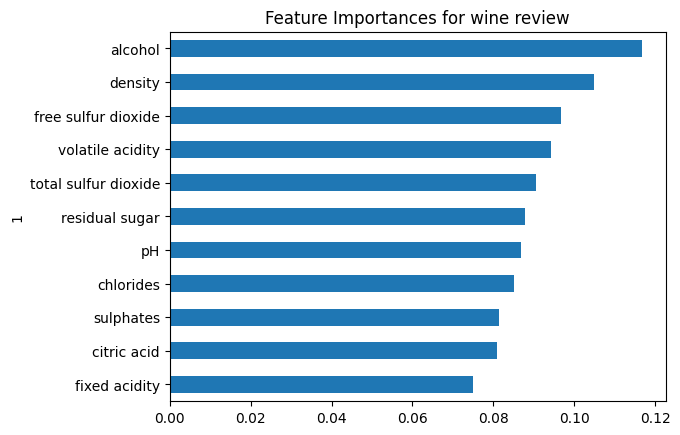

In [27]:
# horizontal bar chart
importantFeaturesDFSorted.plot(
    kind='barh',
    title='Feature Importances for wine review',
    legend=False
    )

## Interactivity: user prompt to get input and predict the wine quality

In [28]:
def predict_wine_quality():
    # Prompt the user for input
    alcohol = float(input("Enter alcohol content: "))
    sulphates = float(input("Enter sulphates content: "))
    total_sulfur_dioxide = float(input("Enter total sulfur dioxide: "))
    volatile_acidity = float(input("Enter volatile acidity: "))
    density = float(input("Enter density: "))
    chlorides = float(input("Enter chlorides: "))
    pH = float(input("Enter pH: "))
    fixed_acidity = float(input("Enter fixed acidity: "))
    residual_sugar = float(input("Enter residual sugar: "))
    citric_acid = float(input("Enter citric acid: "))
    free_sulfur_dioxide = float(input("Enter free sulfur dioxide: "))

    # Create a DataFrame from the user input
    input_data = pd.DataFrame({
        'fixed acidity': [fixed_acidity],
        'volatile acidity': [volatile_acidity],
        'citric acid': [citric_acid],
        'residual sugar': [residual_sugar],
        'chlorides': [chlorides],
        'free sulfur dioxide': [free_sulfur_dioxide],
        'total sulfur dioxide': [total_sulfur_dioxide],
        'density': [density],
        'pH': [pH],
        'sulphates': [sulphates],
        'alcohol': [alcohol]
    })

    # Scale the input data using the pre-trained scaler
    input_scaled = pd.DataFrame(scaler.transform(input_data), columns=input_data.columns)

    # Make predictions for the user input using the Random Forest model
    predicted_quality = rfModel.predict(input_scaled)[0]
    rounded_predicted_quality = round(predicted_quality)

    # Print the predicted quality
    print(f"Predicted Wine Quality: {rounded_predicted_quality}")

In [30]:
# Call the function to predict wine quality and print the result
predict_wine_quality()

Enter alcohol content: 1
Enter sulphates content: 1
Enter total sulfur dioxide: 1
Enter volatile acidity: 1
Enter density: 1
Enter chlorides: 1
Enter pH: 1
Enter fixed acidity: 1
Enter residual sugar: 1
Enter citric acid: 1
Enter free sulfur dioxide: 1
Predicted Wine Quality: 4


## Save the model, re-load it and test it again.

In [31]:
import joblib

# Save the trained model to a file
joblib.dump(rfModel, 'qualityWineRandomForestModel.pkl')

['qualityWineRandomForestModel.pkl']

In [32]:
#load the model back to the notebook
loaded_model = joblib.load('qualityWineRandomForestModel.pkl')